In [55]:
import tensorflow as tf
from tensorflow.keras.layers import Flatten, Dense, Input, BatchNormalization, GlobalAveragePooling2D
from tensorflow.keras.activations import relu
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import Accuracy
from tensorflow.keras.layers import MaxPool2D, Conv2D
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential

In [3]:
import zipfile


r = zipfile.ZipFile("food-101.zip","r")
r.extractall()
r.close()


In [4]:
!ls

food-101  food-101.zip	__MACOSX  sample_data


In [5]:
import os

for path, dir , filename in os.walk("food-101/"):
  print(f"{len(dir)} dir ---> {len(filename)} imgs at {path}")

2 dir ---> 0 imgs at food-101/
101 dir ---> 0 imgs at food-101/train
0 dir ---> 75 imgs at food-101/train/cup_cakes
0 dir ---> 75 imgs at food-101/train/hot_and_sour_soup
0 dir ---> 75 imgs at food-101/train/miso_soup
0 dir ---> 75 imgs at food-101/train/gnocchi
0 dir ---> 75 imgs at food-101/train/mussels
0 dir ---> 75 imgs at food-101/train/cheese_plate
0 dir ---> 75 imgs at food-101/train/french_fries
0 dir ---> 75 imgs at food-101/train/deviled_eggs
0 dir ---> 75 imgs at food-101/train/filet_mignon
0 dir ---> 75 imgs at food-101/train/churros
0 dir ---> 75 imgs at food-101/train/bread_pudding
0 dir ---> 75 imgs at food-101/train/pulled_pork_sandwich
0 dir ---> 75 imgs at food-101/train/chicken_curry
0 dir ---> 75 imgs at food-101/train/spring_rolls
0 dir ---> 75 imgs at food-101/train/donuts
0 dir ---> 75 imgs at food-101/train/croque_madame
0 dir ---> 75 imgs at food-101/train/pizza
0 dir ---> 75 imgs at food-101/train/waffles
0 dir ---> 75 imgs at food-101/train/dumplings
0 dir -

In [6]:
train_dir = "food-101/train"
test_dir = "food-101/test"

In [7]:
# Extract class names
import numpy as np
class_names = np.array(sorted([j for j in os.listdir(train_dir)]))

In [8]:
class_names

array(['apple_pie', 'baby_back_ribs', 'baklava', 'beef_carpaccio',
       'beef_tartare', 'beet_salad', 'beignets', 'bibimbap',
       'bread_pudding', 'breakfast_burrito', 'bruschetta', 'caesar_salad',
       'cannoli', 'caprese_salad', 'carrot_cake', 'ceviche',
       'cheese_plate', 'cheesecake', 'chicken_curry',
       'chicken_quesadilla', 'chicken_wings', 'chocolate_cake',
       'chocolate_mousse', 'churros', 'clam_chowder', 'club_sandwich',
       'crab_cakes', 'creme_brulee', 'croque_madame', 'cup_cakes',
       'deviled_eggs', 'donuts', 'dumplings', 'edamame', 'eggs_benedict',
       'escargots', 'falafel', 'filet_mignon', 'fish_and_chips',
       'foie_gras', 'french_fries', 'french_onion_soup', 'french_toast',
       'fried_calamari', 'fried_rice', 'frozen_yogurt', 'garlic_bread',
       'gnocchi', 'greek_salad', 'grilled_cheese_sandwich',
       'grilled_salmon', 'guacamole', 'gyoza', 'hamburger',
       'hot_and_sour_soup', 'hot_dog', 'huevos_rancheros', 'hummus',
       

In [9]:
import random as rd
import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.image as mimg

In [10]:

def viewData(train_dir=train_dir):
  plt.figure(figsize=(5,5))
  class_names  = [j for j in os.listdir(train_dir)]
  choice = rd.randint(0, len(class_names))
  path_ = train_dir + "/" + class_names[choice]
  files =[ j for j in os.listdir(path_)]
  choice = rd.randint(0, len(files))
  path_ += "/" + files[choice]
  img = mimg.imread(path_)
  plt.title(path_, fontsize=10)
  plt.imshow(img)

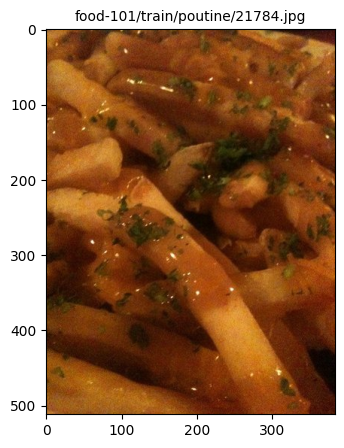

In [11]:
viewData(train_dir)

In [12]:
test_datagen = ImageDataGenerator(rescale=1/255.)
train_datagen = ImageDataGenerator(rescale=1/255.)

In [81]:
train_data = test_datagen.flow_from_directory(directory=train_dir,
                                              target_size=(224,224),
                                              color_mode='rgb',
                                              classes=None ,
                                              shuffle=True,
                                              seed=42,
                                              class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='rgb',
                                             classes=None,
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7575 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [14]:
## Model1

tf.random.set_seed(42)

model1 = Sequential([
    Conv2D(filters=10, kernel_size=(3,3), activation="relu", input_shape=(224,224,3)),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    Conv2D(filters=10, kernel_size=(3,3), activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    Conv2D(filters=10, kernel_size=3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation="softmax")
])


model1.compile(loss="categorical_crossentropy",
               optimizer="adam",
               metrics=["accuracy"])

history1 = model1.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data=test_data,
           validation_steps = len(test_data))

Epoch 1/5
237/237 [==============================] - 99s 391ms/step - loss: 4.6161 - accuracy: 0.0077 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 2/5
237/237 [==============================] - 93s 392ms/step - loss: 4.6159 - accuracy: 0.0071 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 3/5
237/237 [==============================] - 91s 384ms/step - loss: 4.6160 - accuracy: 0.0066 - val_loss: 4.6151 - val_accuracy: 0.0101
Epoch 4/5
237/237 [==============================] - 91s 384ms/step - loss: 4.6160 - accuracy: 0.0067 - val_loss: 4.6151 - val_accuracy: 0.0099
Epoch 5/5
237/237 [==============================] - 96s 405ms/step - loss: 4.6160 - accuracy: 0.0077 - val_loss: 4.6151 - val_accuracy: 0.0099


In [15]:
def plot_the_graph(hist):
  plt.figure(figsize=(10,5))
  plt.subplot(1,2,1)
  plt.title("Accuracy vs Val Accuracy")
  plt.plot(hist.history['accuracy'], label="accuracy")
  plt.plot(hist.history['val_accuracy'], label='val_accuracy')
  plt.legend()

  plt.subplot(1,2,2)
  plt.title('Loss vs Val Loss')
  plt.plot(hist.history['loss'], label="loss")
  plt.plot(hist.history['val_loss'], label='val_loss')
  plt.legend()


In [16]:
model1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 10)      280       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 10)      910       
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 10)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 10)      910       
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 10)      910       
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 10)        0         
 g2D)                                                   

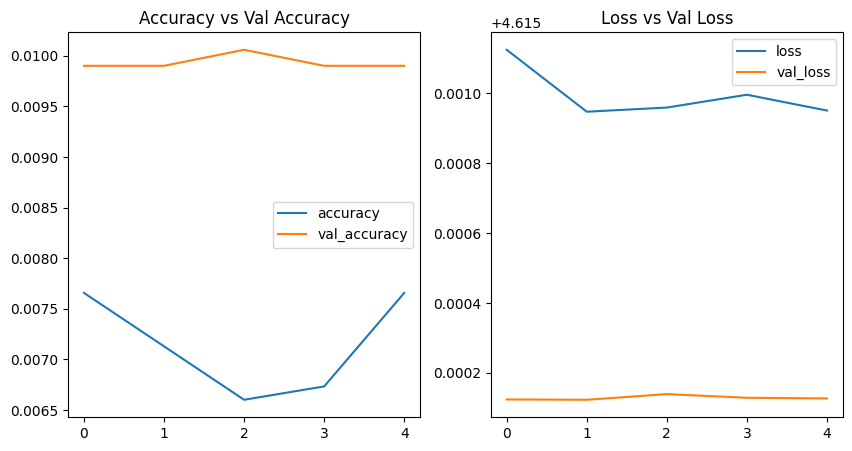

In [17]:
plot_the_graph(history1)

### **Model2**

In [18]:
tf.random.set_seed(42)

model2 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model2.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history2 = model2.fit(train_data,
           epochs = 5,
           steps_per_epoch = len(train_data),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

Epoch 1/5
237/237 [==============================] - 91s 379ms/step - loss: 4.9103 - accuracy: 0.0168 - val_loss: 4.5633 - val_accuracy: 0.0202
Epoch 2/5
237/237 [==============================] - 90s 382ms/step - loss: 3.8648 - accuracy: 0.1687 - val_loss: 4.8226 - val_accuracy: 0.0282
Epoch 3/5
237/237 [==============================] - 93s 395ms/step - loss: 1.6378 - accuracy: 0.6441 - val_loss: 6.9806 - val_accuracy: 0.0305
Epoch 4/5
237/237 [==============================] - 104s 441ms/step - loss: 0.3743 - accuracy: 0.9265 - val_loss: 9.6131 - val_accuracy: 0.0305
Epoch 5/5
237/237 [==============================] - 89s 377ms/step - loss: 0.0691 - accuracy: 0.9896 - val_loss: 11.1488 - val_accuracy: 0.0303


In [19]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 222, 222, 10)      280       
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 111, 111, 10)      0         
 g2D)                                                            
                                                                 
 conv2d_11 (Conv2D)          (None, 109, 109, 10)      910       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 54, 54, 10)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 29160)             0         
                                                                 
 dense_1 (Dense)             (None, 101)              

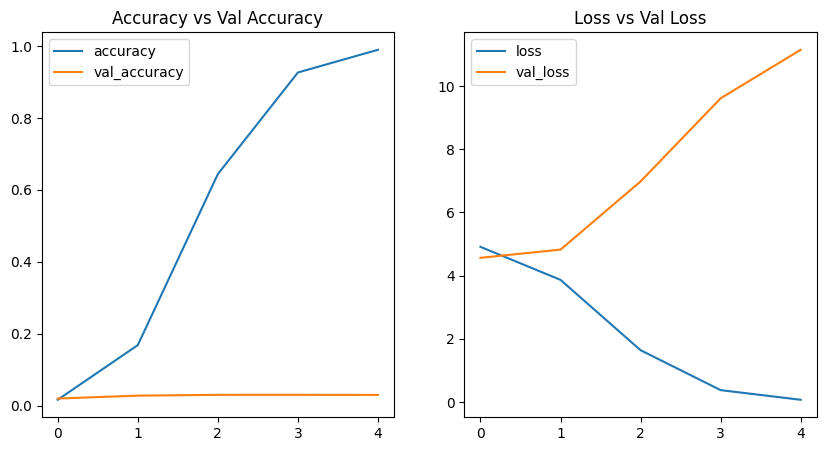

In [20]:
plot_the_graph(history2)

In [24]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                                   shear_range=0.2,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)

train_augdata = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(224,224),
                                                 seed=42,
                                                  color_mode='grayscale',
                                                 batch_size=32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(224,224),
                                             color_mode='grayscale',
                                             classes=None,
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')

Found 7575 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [26]:
tf.random.set_seed(42)

model3 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation='relu', input_shape=(224,224,1)),
    MaxPool2D(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model3.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])
history3 = model3.fit(train_augdata,
           epochs = 5,
           steps_per_epoch = len(train_augdata),
           validation_data = test_data,
           validation_steps = len(test_data)
           )

Epoch 1/5
237/237 [==============================] - 112s 464ms/step - loss: 4.6342 - accuracy: 0.0128 - val_loss: 4.5569 - val_accuracy: 0.0172
Epoch 2/5
237/237 [==============================] - 110s 467ms/step - loss: 4.5587 - accuracy: 0.0194 - val_loss: 4.5274 - val_accuracy: 0.0265
Epoch 3/5
237/237 [==============================] - 108s 457ms/step - loss: 4.5294 - accuracy: 0.0260 - val_loss: 4.5002 - val_accuracy: 0.0288
Epoch 4/5
237/237 [==============================] - 108s 459ms/step - loss: 4.5058 - accuracy: 0.0296 - val_loss: 4.5012 - val_accuracy: 0.0299
Epoch 5/5
237/237 [==============================] - 109s 462ms/step - loss: 4.4835 - accuracy: 0.0310 - val_loss: 4.5617 - val_accuracy: 0.0254


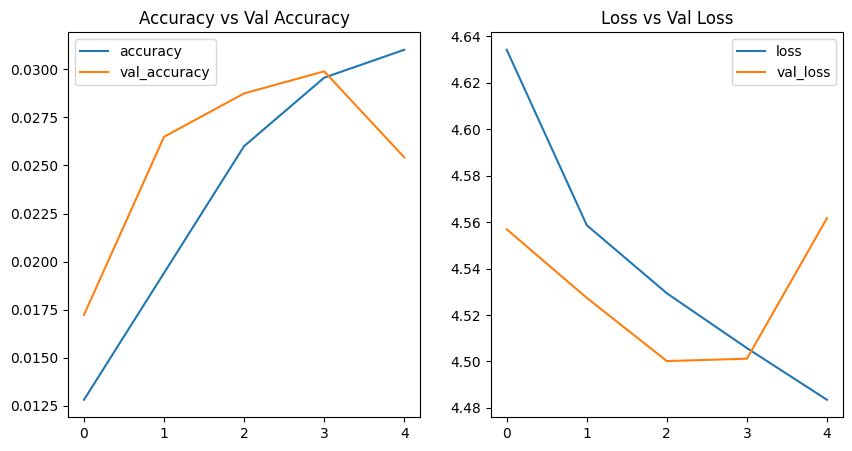

In [27]:
plot_the_graph(history3)

In [51]:
train_datagen = ImageDataGenerator(rescale=1/225.,
                                   shear_range=0.2,
                                   rotation_range = 20,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   zoom_range=0.2,
                                   featurewise_center=True,
                                   horizontal_flip=True)

train_augdata = train_datagen.flow_from_directory(train_dir,
                                                 target_size=(32,32),
                                                 seed=42,
                                                 batch_size=32,
                                                 class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(directory=test_dir,
                                             target_size=(32,32),
                                             color_mode='rgb',
                                             shuffle=False,
                                             seed=42,
                                             class_mode = 'categorical')


Found 7575 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [56]:
tf.random.set_seed(42)

model4 = Sequential([
    Conv2D(filters=64, kernel_size=3, activation='relu', input_shape=(32,32,3)),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(filters=64, kernel_size=3, activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    Conv2D(filters=10, kernel_size=3, activation='relu'),
    MaxPool2D(),
    BatchNormalization(),
    GlobalAveragePooling2D(),
    Flatten(),
    Dense(len(class_names), activation='softmax')
])

model4.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history4 = model4.fit(train_augdata,
           epochs = 5,
           steps_per_epoch = len(train_augdata),
           validation_data = test_data,
           validation_steps = len(test_data)
           )


Epoch 1/5


/usr/local/lib/python3.10/dist-packages/keras/src/preprocessing/image.py:1862: UserWarning: This ImageDataGenerator specifies `featurewise_center`, but it hasn't been fit on any training data. Fit it first by calling `.fit(numpy_data)`.
  warnings.warn(


237/237 [==============================] - 105s 434ms/step - loss: 4.5885 - accuracy: 0.0197 - val_loss: 4.6074 - val_accuracy: 0.0161
Epoch 2/5
237/237 [==============================] - 69s 293ms/step - loss: 4.4887 - accuracy: 0.0335 - val_loss: 4.4548 - val_accuracy: 0.0420
Epoch 3/5
237/237 [==============================] - 70s 295ms/step - loss: 4.4109 - accuracy: 0.0403 - val_loss: 4.3913 - val_accuracy: 0.0430
Epoch 4/5
237/237 [==============================] - 71s 300ms/step - loss: 4.3513 - accuracy: 0.0473 - val_loss: 4.3939 - val_accuracy: 0.0430
Epoch 5/5
237/237 [==============================] - 69s 291ms/step - loss: 4.2910 - accuracy: 0.0587 - val_loss: 4.3008 - val_accuracy: 0.0547


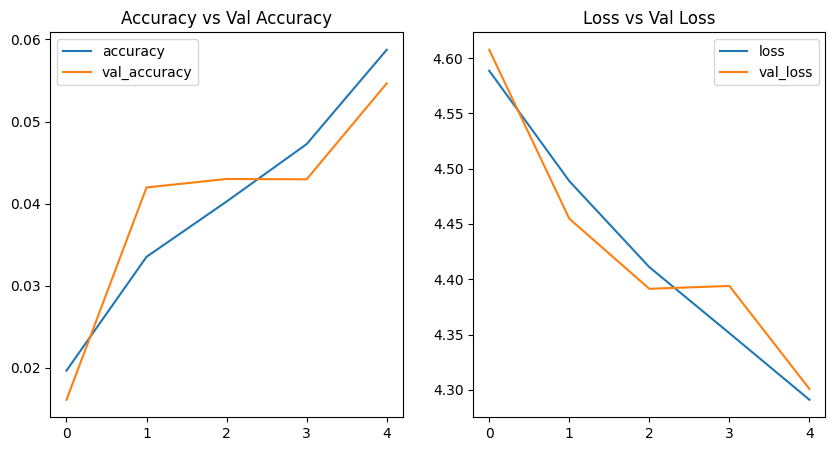

In [57]:
plot_the_graph(history4)

## ***Transfer Learning***

In [58]:
import datetime

In [59]:
train_data = ImageDataGenerator(rescale=1/255.,
                                shear_range=0.2,
                                height_shift_range=0.2,
                                width_shift_range=0.2,
                                horizontal_flip=True,
                                zoom_range=0.2,
                                rotation_range=20)
train_data1 = ImageDataGenerator(rescale=1/255.)

test_data = ImageDataGenerator(rescale=1/255.)
train_data_aug = train_data.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

train_data_aug1 = train_data1.flow_from_directory(train_dir,
                                                target_size=(224,224),
                                                batch_size=32,
                                                class_mode='categorical',
                                                seed=42)

test_data_aug = test_data.flow_from_directory(test_dir,
                                              target_size=(224,224),
                                              batch_size=32,
                                              class_mode='categorical',
                                              seed=42)

Found 7575 images belonging to 101 classes.
Found 7575 images belonging to 101 classes.
Found 25250 images belonging to 101 classes.


In [60]:
import datetime
def create_callbacks(dir_name, exp_name):
    log_dir = dir_name + "/" + exp_name + "/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
    tens_callbacks = tf.keras.callbacks.TensorBoard(
        log_dir = "./logs"
    )
    print(f"Dumping the logs in {log_dir} ")
    return tens_callbacks

In [61]:
import tensorflow_hub as hub

In [62]:
resnet_url = "https://tfhub.dev/google/imagenet/resnet_v2_50/feature_vector/5"


In [63]:
efficientnet_url = 'https://tfhub.dev/google/imagenet/efficientnet_v2_imagenet1k_b0/feature_vector/2'

In [64]:
model5 = Sequential([
    hub.KerasLayer(resnet_url,
    trainable=False,
    name ="feature_extractor_layer",
                   input_shape=(224,224,3)),
    Dense(len(np.array(class_names)), activation='softmax')
])


In [65]:
model5.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

In [66]:
history5 = model5.fit(train_data_aug,
           epochs=5,
           steps_per_epoch=len(train_data_aug),
           validation_data= test_data_aug,
           validation_steps = len(test_data_aug),
           callbacks=create_callbacks("tensorflow_hub", "Resnet"))

Dumping the logs in tensorflow_hub/Resnet/20240121-085605 
Epoch 1/5
237/237 [==============================] - 265s 1s/step - loss: 3.4596 - accuracy: 0.2244 - val_loss: 2.3821 - val_accuracy: 0.4038
Epoch 2/5
237/237 [==============================] - 198s 838ms/step - loss: 2.2559 - accuracy: 0.4375 - val_loss: 2.1101 - val_accuracy: 0.4655
Epoch 3/5
237/237 [==============================] - 197s 833ms/step - loss: 1.9111 - accuracy: 0.5123 - val_loss: 2.0763 - val_accuracy: 0.4787
Epoch 4/5
237/237 [==============================] - 256s 1s/step - loss: 1.6930 - accuracy: 0.5510 - val_loss: 2.1000 - val_accuracy: 0.4750
Epoch 5/5
237/237 [==============================] - 201s 848ms/step - loss: 1.5412 - accuracy: 0.5892 - val_loss: 2.0804 - val_accuracy: 0.4817


In [67]:
model5.summary()

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor_layer (K  (None, 2048)              23564800  
 erasLayer)                                                      
                                                                 
 dense_17 (Dense)            (None, 101)               206949    
                                                                 
Total params: 23771749 (90.68 MB)
Trainable params: 206949 (808.39 KB)
Non-trainable params: 23564800 (89.89 MB)
_________________________________________________________________


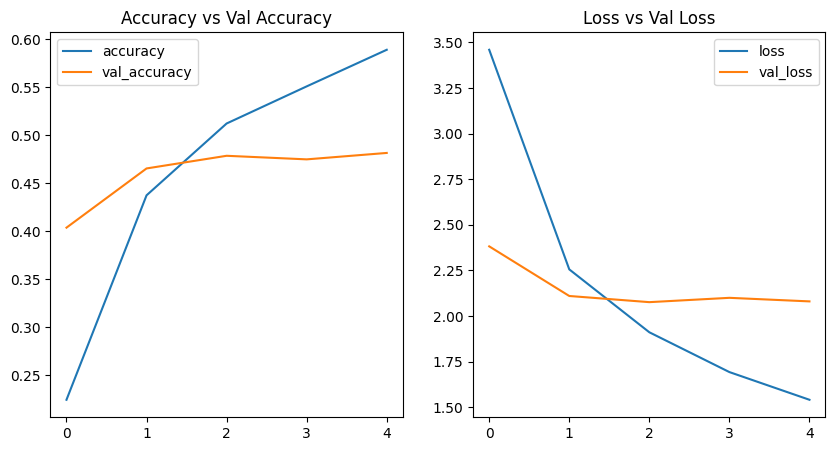

In [68]:
plot_the_graph(history5)

In [71]:

tf.random.set_seed(42)

model6 = Sequential([
    hub.KerasLayer(efficientnet_url,
                   trainable=False,
                   name="feature_extractor",
                   input_shape=(224,224,3)),
    Dense(len(class_names), activation='softmax')
])

model6.compile(loss='categorical_crossentropy',
               optimizer='adam',
               metrics=['accuracy'])

history6 = model6.fit(train_data_aug1,
                      epochs=20,
                      steps_per_epoch = len(train_data_aug1),
                      validation_data= test_data_aug,
                      validation_steps = int(0.2 * len(test_data_aug)),
                       callbacks=create_callbacks('logs',"EfficientNet"))

Exception ignored in: <function _xla_gc_callback at 0x7d8ac9ab0ca0>
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/jax/_src/lib/__init__.py", line 97, in _xla_gc_callback
    def _xla_gc_callback(*args):
KeyboardInterrupt: 


Dumping the logs in logs/EfficientNet/20240121-092755 
Epoch 1/20
237/237 [==============================] - 48s 169ms/step - loss: 3.4223 - accuracy: 0.2523 - val_loss: 2.5888 - val_accuracy: 0.4195
Epoch 2/20
237/237 [==============================] - 47s 197ms/step - loss: 2.2531 - accuracy: 0.4834 - val_loss: 2.1710 - val_accuracy: 0.4836
Epoch 3/20
237/237 [==============================] - 46s 196ms/step - loss: 1.8329 - accuracy: 0.5727 - val_loss: 2.0225 - val_accuracy: 0.4986
Epoch 4/20
237/237 [==============================] - 41s 172ms/step - loss: 1.5702 - accuracy: 0.6343 - val_loss: 1.9768 - val_accuracy: 0.4982
Epoch 5/20
237/237 [==============================] - 45s 192ms/step - loss: 1.3783 - accuracy: 0.6815 - val_loss: 1.9046 - val_accuracy: 0.5121
Epoch 6/20
237/237 [==============================] - 47s 197ms/step - loss: 1.2224 - accuracy: 0.7249 - val_loss: 1.8899 - val_accuracy: 0.5178
Epoch 7/20
237/237 [==============================] - 42s 178ms/step - loss

In [72]:
model6.summary()

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 feature_extractor (KerasLa  (None, 1280)              5919312   
 yer)                                                            
                                                                 
 dense_20 (Dense)            (None, 101)               129381    
                                                                 
Total params: 6048693 (23.07 MB)
Trainable params: 129381 (505.39 KB)
Non-trainable params: 5919312 (22.58 MB)
_________________________________________________________________


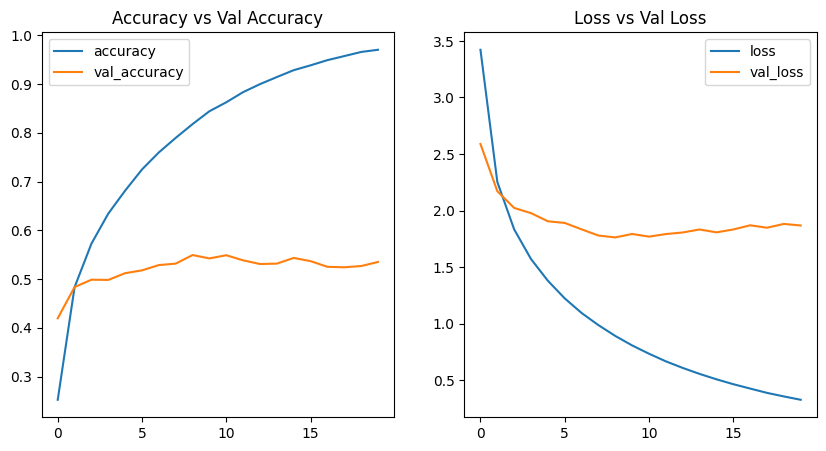

In [74]:
plot_the_graph(history6)

In [75]:

import random as rd

from PIL import Image
def prepareData(img_path):
  img = Image.open(img_path).convert("RGB")
  img = tf.image.resize(img, size=(224,224))
  img = img/255.
  return img

def predict_plot(model, path="food-101/test/"):
  plt.figure(figsize=(20,6))
  for i in range(6):
      plt.subplot(1,6,i+1)
      path="food-101/test/"
      dir_choice  =  os.listdir(path)
      food_class = dir_choice[rd.randint(0,len(dir_choice)-1)]
      path += food_class + "/"
      img_choice = os.listdir(path)
      path += img_choice[rd.randint(0,len(img_choice)-1)]
      samp_ = prepareData(path)
      samp = tf.expand_dims(samp_, axis=0)
      pred_ = int((model.predict(samp).argmax()))
      pred_class = class_names[pred_]
      if pred_class == food_class:
        plt.title(f"{class_names[pred_]}", c='g')
      else:
        plt.title(f"{pred_class}", c='r')
      plt.imshow(samp_)


1/1 [==============================] - 0s 30ms/step


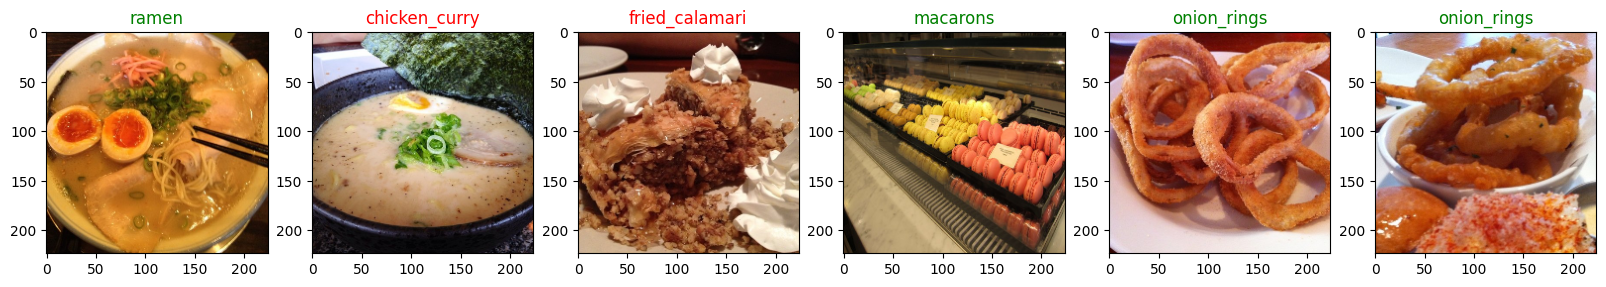

In [79]:
predict_plot(model6)

In [83]:
train_dir = "food-101/train/"
test_dir = "food-101/test/"

train_data = tf.keras.utils.image_dataset_from_directory(directory=train_dir,
                                                         image_size = (224,224),
                                                         batch_size=32,
                                                         shuffle=True,
                                                         label_mode='categorical')

test_data = tf.keras.utils.image_dataset_from_directory(directory=test_dir,
                                                       image_size = (224,224),
                                                       color_mode='rgb',
                                                       shuffle=False,
                                                       label_mode='categorical')



Found 7575 files belonging to 101 classes.
Found 25250 files belonging to 101 classes.


In [85]:
tf.random.set_seed(42)

base_model = tf.keras.applications.efficientnet_v2.EfficientNetV2B0(include_top=False)


base_model.trainable = False

inputs = tf.keras.layers.Input(shape=(224,224,3), name="Input Layer")

x = base_model(inputs)

print(f"Input Shape after Base Model is {x.shape}")

x = tf.keras.layers.GlobalAveragePooling2D(name="global_average_pooling_layer")(x)

print(f"Input Shape after pooling is {x.shape}")

outputs = tf.keras.layers.Dense(len(class_names), activation='softmax', name='Output_Layer') (x)

print(f"Output Shape is {outputs.shape}")

model0 = tf.keras.Model(inputs, outputs)

model0.compile(loss=tf.keras.losses.categorical_crossentropy,
               optimizer = "adam",
               metrics=['accuracy'])

history0 = model0.fit(train_data,
                      epochs=10,
                      steps_per_epoch = len(train_data),
                      validation_data = test_data,
                      validation_steps =int(0.2 * len(test_data)),
                      callbacks=[create_callbacks("Efficientv2B0", "10_per_data")])

Input Shape after Base Model is (None, 7, 7, 1280)
Input Shape after pooling is (None, 1280)
Output Shape is (None, 101)
Dumping the logs in Efficientv2B0/10_per_data/20240121-095559 
Epoch 1/10
237/237 [==============================] - 37s 124ms/step - loss: 3.2011 - accuracy: 0.3108 - val_loss: 2.5330 - val_accuracy: 0.4391
Epoch 2/10
237/237 [==============================] - 30s 125ms/step - loss: 1.9555 - accuracy: 0.5578 - val_loss: 2.0372 - val_accuracy: 0.5176
Epoch 3/10
237/237 [==============================] - 27s 111ms/step - loss: 1.5538 - accuracy: 0.6363 - val_loss: 1.8900 - val_accuracy: 0.5358
Epoch 4/10
237/237 [==============================] - 27s 111ms/step - loss: 1.3378 - accuracy: 0.6861 - val_loss: 1.8006 - val_accuracy: 0.5457
Epoch 5/10
237/237 [==============================] - 27s 111ms/step - loss: 1.1596 - accuracy: 0.7323 - val_loss: 1.7348 - val_accuracy: 0.5568
Epoch 6/10
237/237 [==============================] - 27s 111ms/step - loss: 1.0358 - accur

In [86]:
model0.summary()

Model: "model_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Input Layer (InputLayer)    [(None, 224, 224, 3)]     0         
                                                                 
 efficientnetv2-b0 (Functio  (None, None, None, 1280   5919312   
 nal)                        )                                   
                                                                 
 global_average_pooling_lay  (None, 1280)              0         
 er (GlobalAveragePooling2D                                      
 )                                                               
                                                                 
 Output_Layer (Dense)        (None, 101)               129381    
                                                                 
Total params: 6048693 (23.07 MB)
Trainable params: 129381 (505.39 KB)
Non-trainable params: 5919312 (22.58 MB)
______________

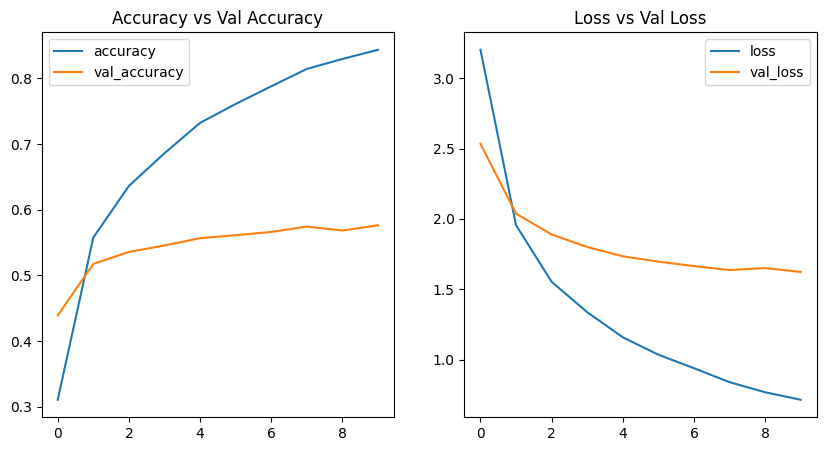

In [88]:
plot_the_graph(history0)